In [2]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./../processed_data.csv")

X = df.drop('churn', axis=1)
y = df['churn']

# Balancing data
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

X_train.replace({'yes': 1, 'no': 0}, inplace=True)
X_test.replace({'yes': 1, 'no': 0}, inplace=True)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X_balanced

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,79.0,1,0,31.0,173.2,98.0,30.629386,149.5,123.0,12.71,245.7,91.000000,11.06,11.50000,7.000000,3.11,1.0
1,41.0,1,1,0.0,182.1,89.0,30.960000,211.5,104.0,17.98,207.4,99.932929,9.33,6.80000,1.000000,1.84,1.0
2,107.0,1,1,0.0,90.7,90.0,15.420000,207.5,109.0,17.64,169.4,96.000000,7.62,5.60000,5.000000,1.51,2.0
3,67.0,1,0,31.0,175.2,68.0,29.780000,199.2,73.0,16.93,219.8,99.000000,9.89,10.25901,6.000000,3.56,1.0
4,121.0,1,0,41.0,215.5,95.0,36.640000,241.8,92.0,20.55,147.0,108.000000,6.61,9.60000,3.000000,2.59,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,106.0,1,1,0.0,210.6,96.0,35.800000,249.2,85.0,21.18,191.4,88.000000,8.61,12.40000,1.000000,3.35,2.0
1410,102.0,1,1,0.0,183.2,112.0,31.140000,187.5,113.0,15.94,232.3,77.000000,10.45,9.20000,5.000000,2.48,1.0
1411,92.0,1,1,0.0,325.4,73.0,55.320000,127.8,100.0,10.86,209.9,98.000000,9.45,9.30000,4.432525,2.51,1.0
1412,124.0,0,1,0.0,157.8,71.0,26.830000,203.2,114.0,17.27,168.7,82.000000,7.59,10.00000,2.000000,2.70,3.0


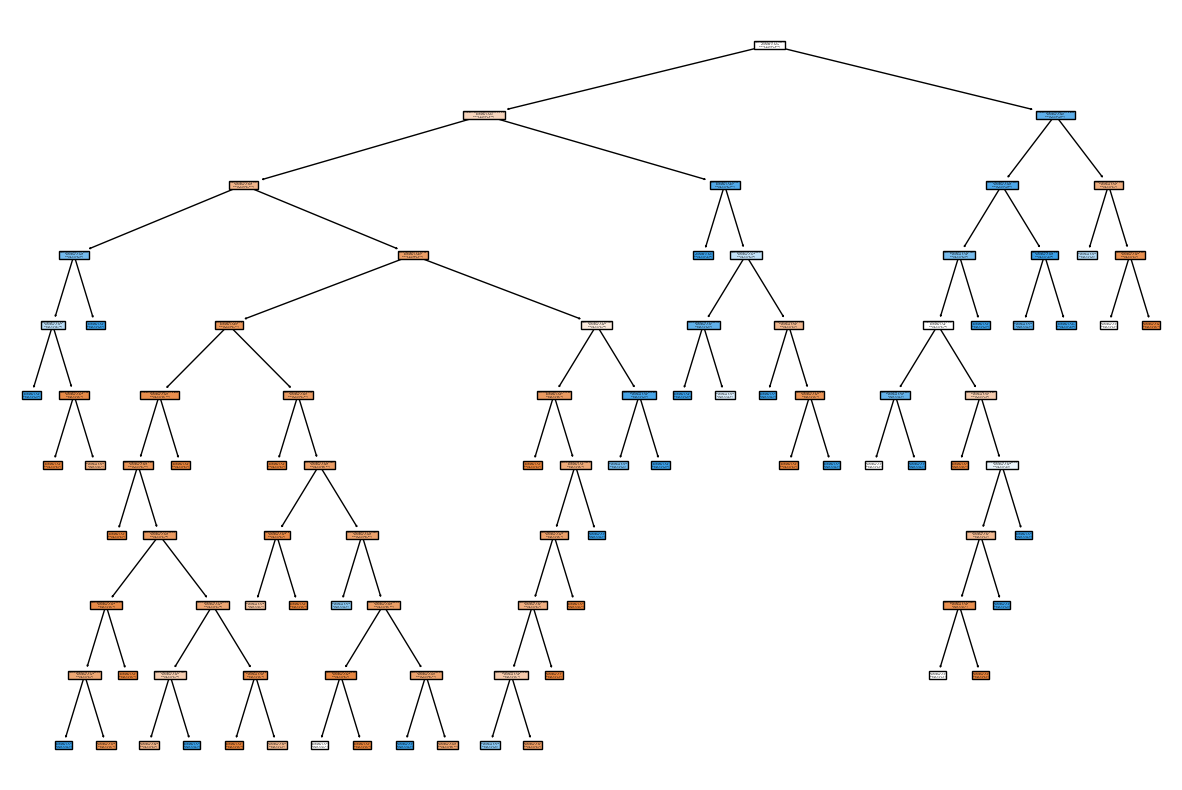

Accuracy: 0.8303886925795053

Confusion Matrix:
 [[122  18]
 [ 30 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       140
           1       0.86      0.79      0.82       143

    accuracy                           0.83       283
   macro avg       0.83      0.83      0.83       283
weighted avg       0.83      0.83      0.83       283

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


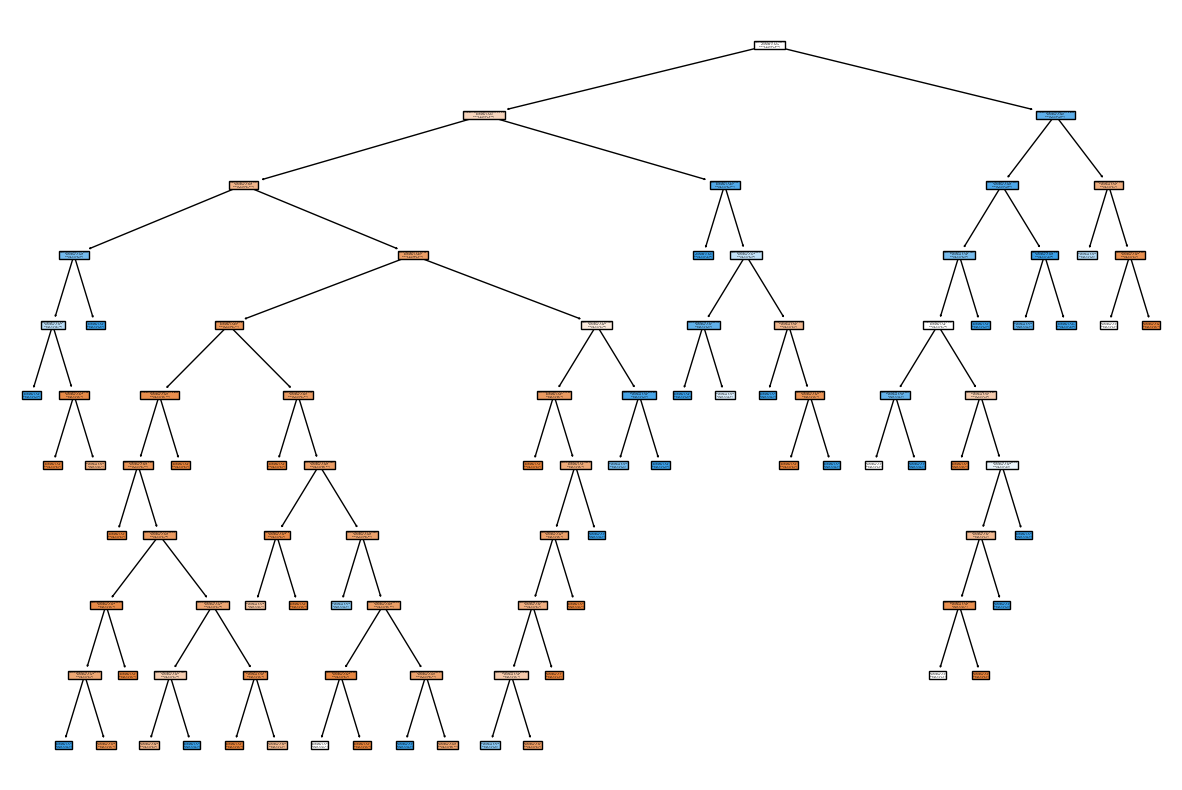

In [8]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=10)
dt_model.fit(X_train, y_train_encoded)

y_pred = dt_model.predict(X_test)

# Ocena modelu
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

# Visualization
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=df['churn'].unique())
plt.show()

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


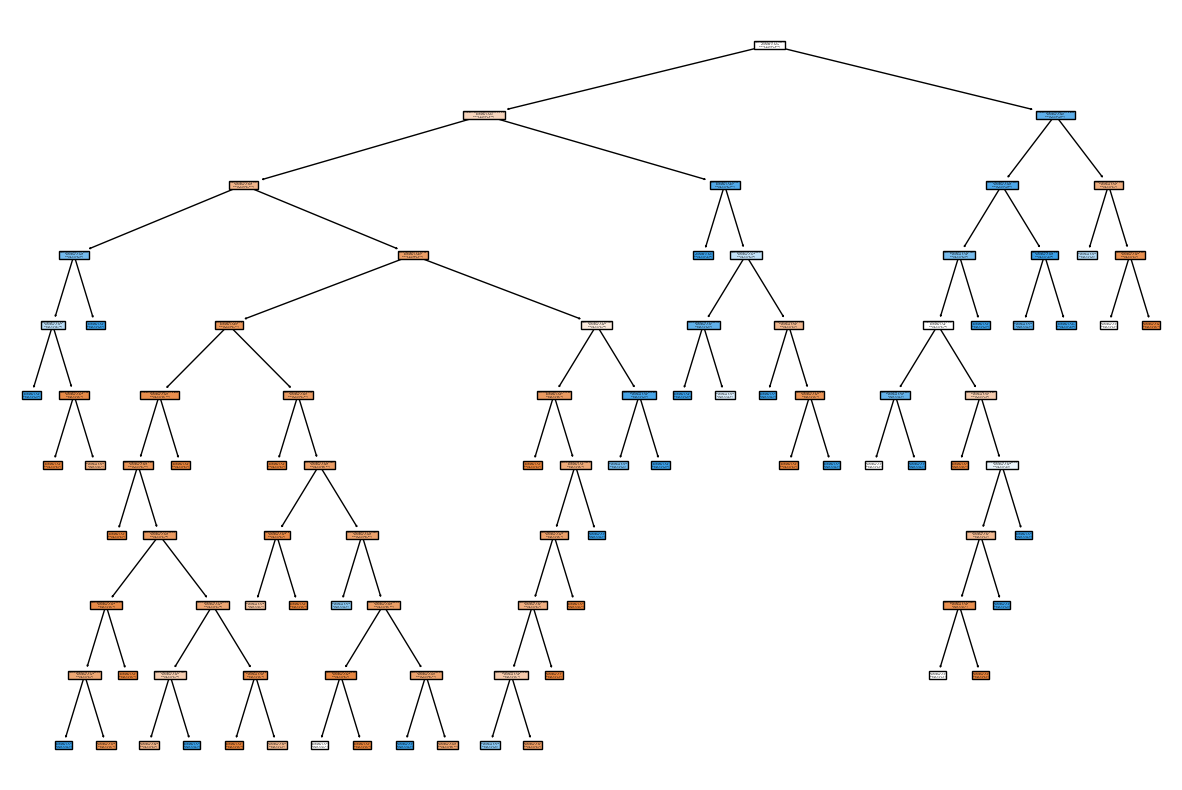

In [4]:
# Hyperparameters tuning

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train_encoded)#y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_

# Visualization
plt.figure(figsize=(15, 10))
tree.plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=df['churn'].unique())
plt.show()